# Spam - Ham classification through TF-IDF Vectorizer

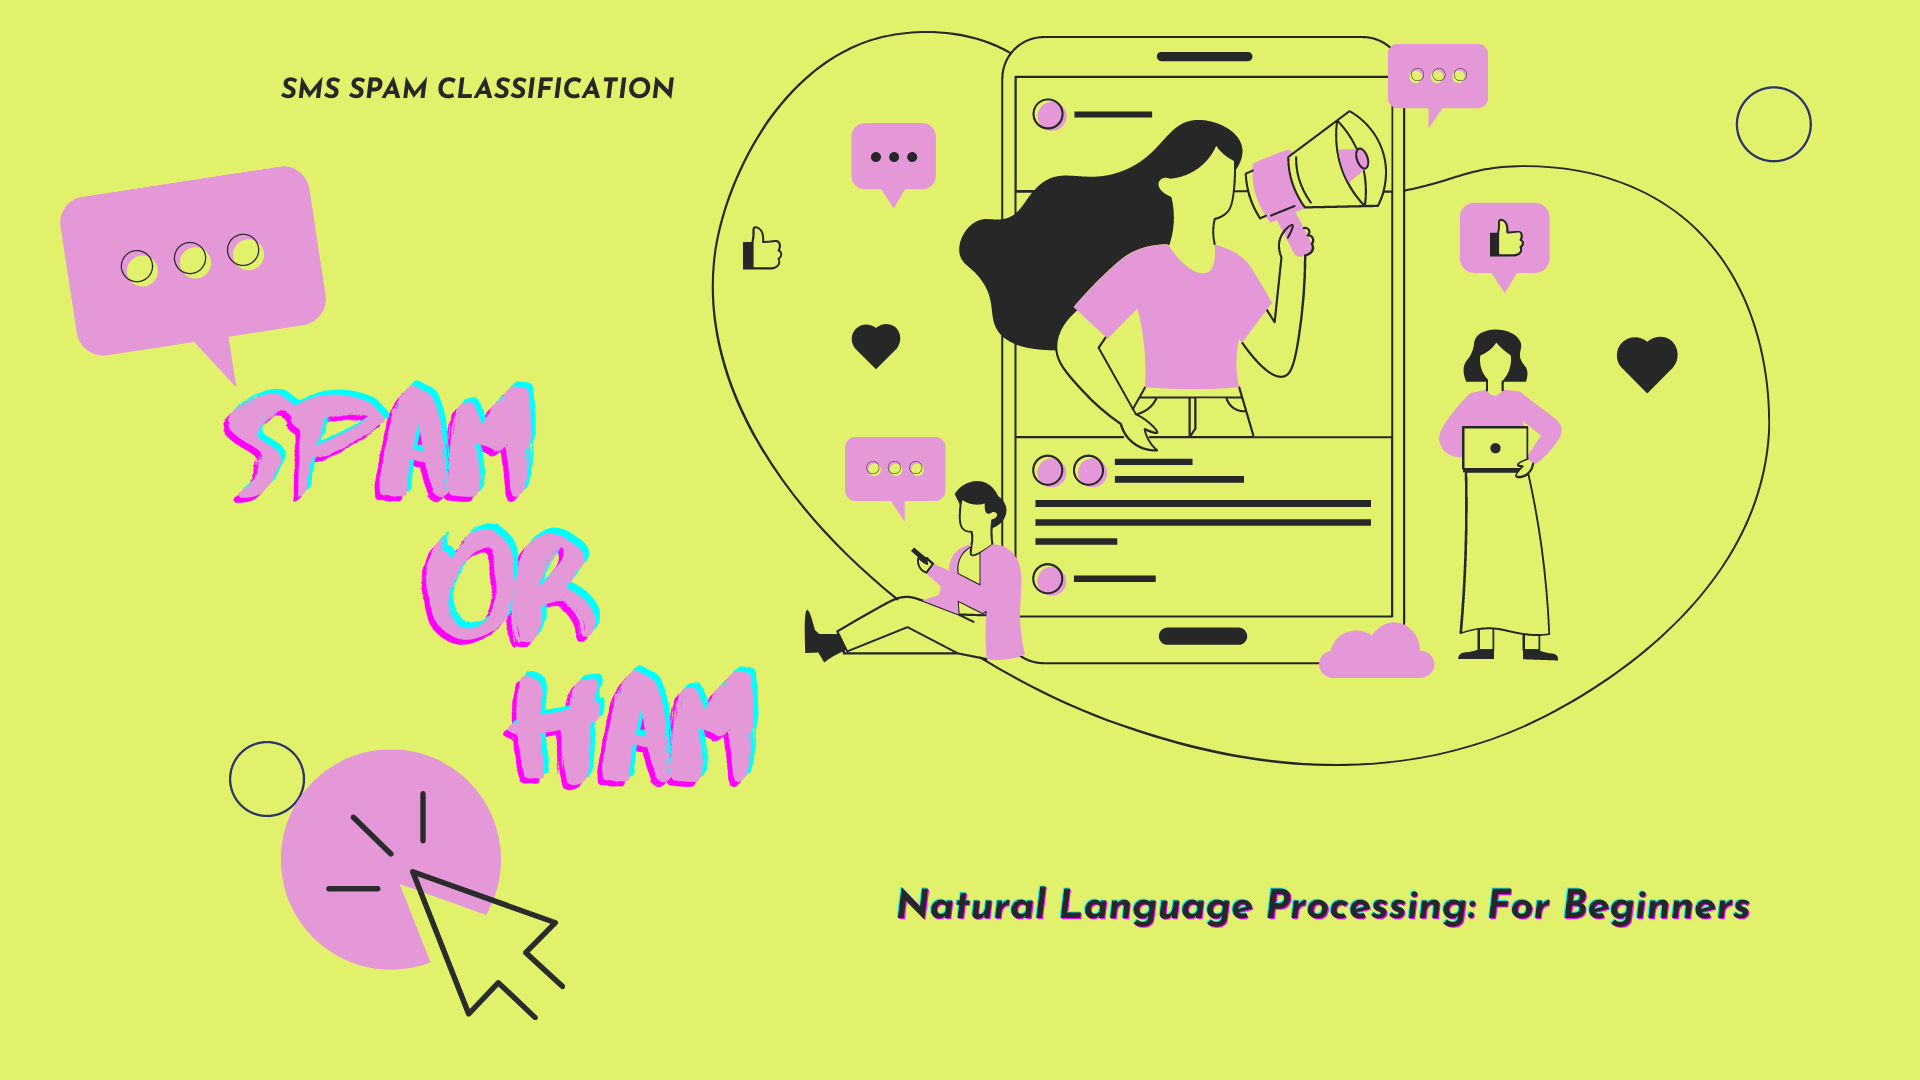

In [58]:
from IPython.display import Image
Image("/content/smp.png")

## Problem Statement:


The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. You can find it on Kaggle at the following link: https://www.kaggle.com/uciml/sms-spam-collection-dataset

## Loading Libraries

In [41]:
import re
import string
import numpy as np
import pandas as pd
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Read the dataset

In [46]:
data = pd.read_csv('/content/SMSSpamCollection.csv',sep='\t',names=['label','message'])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#for counting ham and spam

data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Text(0.5, 1.0, 'Distribution of Spam and Ham')

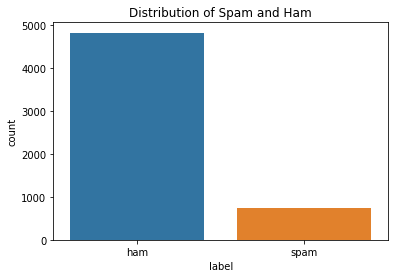

In [12]:
#plotting graph for distribution

sns.countplot(x = "label", data = data)
data.loc[:, 'label'].value_counts()
plt.title('Distribution of Spam and Ham')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


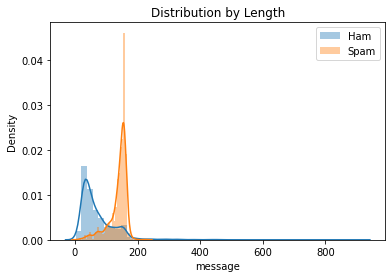

In [14]:
# plotting graph by length.

ham =data[data['label'] == 'ham']['message'].str.len()
sns.distplot(ham, label='Ham')
spam = data[data['label'] == 'spam']['message'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

In [16]:
#for counting frequently occurence of spam and ham.

count1 = Counter(" ".join(data[data['label'] == 'ham']['message']).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(data[data['label']=='spam']["message"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

## Graph for top 30 words of ham

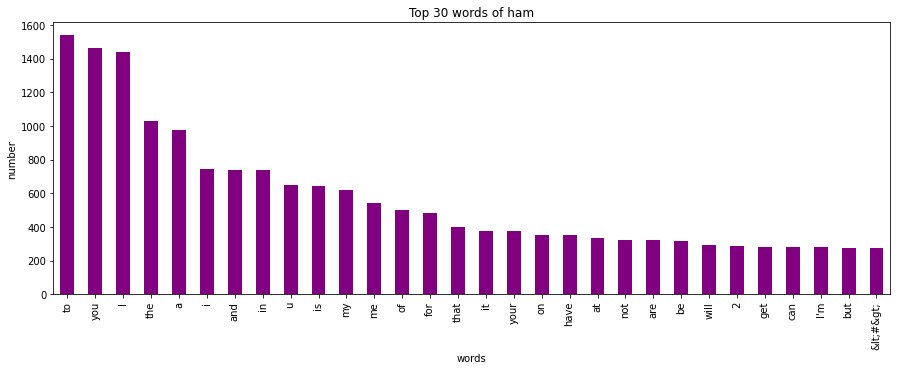

In [18]:
data1.plot.bar(legend = False, color = 'purple',figsize = (15,5))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

## Graph for top 30 words of spam

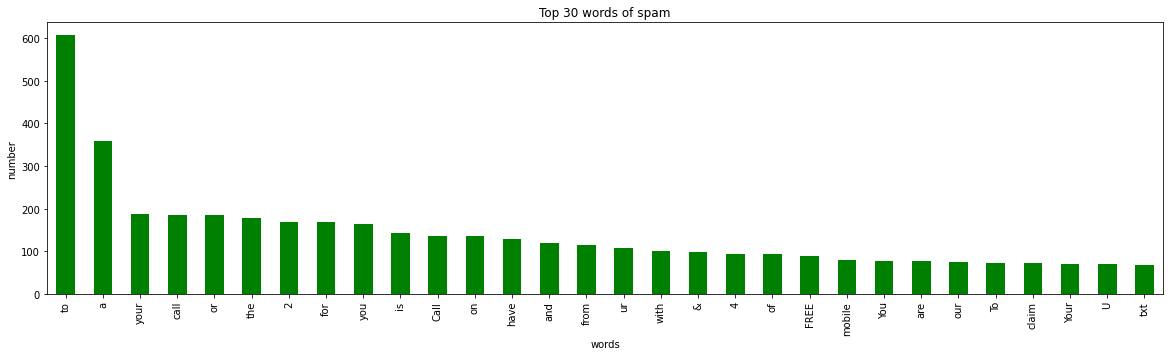

In [20]:
data2.plot.bar(legend = False, color = 'green', figsize = (20,5))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

##  Clean the data, dropping the stop words and pass through lemmatization

In [42]:
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

def alternative_review_messages(msg):
    msg = msg.lower()
    nltk_pos = [tag[1] for tag in pos_tag(word_tokenize(msg))]
    msg = [tag[0] for tag in pos_tag(word_tokenize(msg))]
    wnpos = ['a' if tag[0] == 'J' else tag[0].lower() if tag[0] in ['N', 'R', 'V'] else 'n' for tag in nltk_pos]
    msg = " ".join([lemmatizer.lemmatize(word, wnpos[i]) for i, word in enumerate(msg)])

    # removing stopwords 
    msg = [word for word in msg.split() if word not in stopwords]

    return msg

In [47]:
data['message'] = data['message'].apply(review_messages)

##Vectorizing the Text

In [48]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(, test_size = 0.1, random_state = 1)
# training the vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

## Building and Testing the Classifier

In [49]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [50]:
X_test = vectorizer.transform(X_test)
y_pred=spam_detect_model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}%".format(round((accuracy_score(y_test,y_pred)*100),2)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[489   0]
 [ 17  52]]
Accuracy Score 96.95%
Classification report:               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       489
        spam       1.00      0.75      0.86        69

    accuracy                           0.97       558
   macro avg       0.98      0.88      0.92       558
weighted avg       0.97      0.97      0.97       558



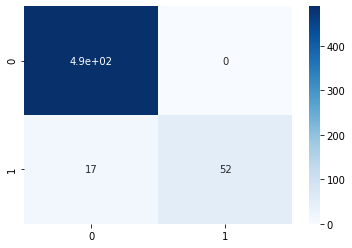

In [63]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')

##  Test Against New Messages

In [53]:
def pred(msg):
    msg = vectorizer.transform([msg])
    prediction = spam_detect_model.predict(msg)
    return prediction[0]

In [55]:
pred("Free entry in 2 a wkly comp to win FA Cup fina")

'spam'